<a href="https://colab.research.google.com/github/ulises1229/IntroPythonCENAM/blob/master/code/cenam_d%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Día 3 - Curso-Taller: Visualización de datos y modelado
##### Autores: Ulises Olivares, Walter Hauri
##### uolivares@unam.mx
##### 16 de diciembre de 2022


## 1. Visualización de datos

In [1]:
# Cargamos la biblioteca de Seaborn para hacer los gráficos
import seaborn as sns
import matplotlib.pyplot as plt # Como ayuda para algunas visualizaciones 

# Así como pandas para la lectura
import pandas as pd

In [2]:
# Agregamos un poco de configuración para las gráficas (puedes explorar un poco más aquí: https://seaborn.pydata.org/tutorial/aesthetics.html)
sns.set_style("dark")
#sns.set_context("poster")

Hacemos la lectura de los datos a graficar

In [3]:
temp = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/temp.csv")
temp.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


#### 1.1 Gráfico de línea

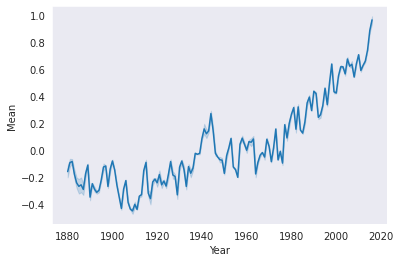

In [4]:
sns.lineplot(data=temp, x="Year", y="Mean");

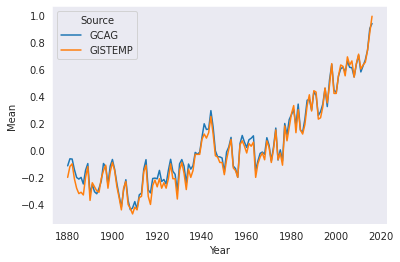

In [11]:
sns.lineplot(data=temp, x="Year", y="Mean", hue="Source"); # Lo separamos por la fuente

##### 1.1.1 Datos reales de vibración

Ejemplo con datos de colegas CENAM

In [12]:
# Hacemos la lectura de los datos
vibrations = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/Ejemplo Datos Vibraciones.csv")
vibrations

InvalidURL: ignored

In [ ]:
vibrations.dtypes # Verificamos los tipos de dato

In [ ]:
vibrations.drop(columns=["Acelerómetro"]).groupby(by=["Año"]).describe()

In [ ]:
vibrations_clean = vibrations.rename(columns={"Frecuencia (Hz)": "Frecuencia", "Sensibilidad (mV/m/s2)": "Sensibilidad"})

In [ ]:
# Graficamos para cada año
sns.lineplot(data=vibrations_clean, x="Frecuencia", y="Sensibilidad", hue="Año");

In [ ]:
# Un único año
year = 2018
ax = sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == year], x="Frecuencia", y="Sensibilidad")
ax.set_title(f"Vibraciones año {year}");

In [ ]:
# Una figura con un gráfico por año

fig = plt.Figure(figsize=(10, 10))
fig.tight_layout(pad=10.0)

ax1 = plt.subplot(2, 3, 1)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2018], x="Frecuencia", y="Sensibilidad")
ax1.set(title="Vibraciones 2018", xlabel="", ylabel=r"Sensibilidad ($\frac{mV \dot m}{s^2}$)")

ax2 = plt.subplot(2, 3, 2)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2019], x="Frecuencia", y="Sensibilidad")
ax2.set(title="Vibraciones 2019", ylabel="", xlabel="")
ax2.set_yticklabels([])

ax3 = plt.subplot(2, 3, 3)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2020], x="Frecuencia", y="Sensibilidad")
ax3.set(title="Vibraciones 2020", ylabel="", xlabel="")
ax3.set_yticklabels([])

ax4 = plt.subplot(2, 3, 4)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2021], x="Frecuencia", y="Sensibilidad")
ax4.set(title="Vibraciones 2021", xlabel=r"Frecuencia ($Hz$)", ylabel="")

ax5 = plt.subplot(2, 3, 5)
sns.lineplot(data=vibrations_clean[vibrations_clean["Año"] == 2022], x="Frecuencia", y="Sensibilidad")
ax5.set(title="Vibraciones 2022", ylabel="", xlabel="")
ax5.set_yticklabels([])

plt.subplots_adjust(wspace=0.2, hspace=0.8)

plt.show()

Otro ejemplo con una señal de impacto mecánico

In [ ]:
# Leemos los datos y los visualizamos
signal = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/Imp_2k_signals-1.csv", header=None, sep="\t")
signal.head()

In [ ]:
signal = signal.rename(
    {
        0: "?",
        1: "?",
        2: "?",
    })

In [ ]:
signal.shape

In [ ]:
signal.describe()

In [ ]:
sns.pairplot(data=signal);

Hacemos la lactura de los datos a graficar

In [ ]:
flights = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/flights.csv")
flights.head()

Gráfico de dispersión

In [ ]:
sns.scatterplot(data=flights, x="dep_delay", y="arr_delay");

In [ ]:
flights["delay"] = flights["arr_delay"] - flights["dep_delay"] # Evaluamos el retraso neto del vuelo

In [ ]:
sns.scatterplot(data=flights, x="air_time", y="delay", hue="origin");

##### 1.1.2 Ejemplo de vibraciones

In [ ]:
# Calculamos la diferencia entre dos años
year_1 = 2018
year_2 = 2022

vibrations_y1 = vibrations_clean[vibrations_clean["Año"] == year_1]
vibrations_y2 = vibrations_clean[vibrations_clean["Año"] == year_2]

# Calculamos la diferencia
difference = vibrations_y2["Sensibilidad"].values - vibrations_y1["Sensibilidad"].values

sns.scatterplot(x=vibrations_y1["Frecuencia"], y=difference);

### 1.2 Histograma de frecuencias

Hacemos la lectura de los datos a graficar

In [ ]:
salaries = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/salaries.csv")
salaries.head()

In [ ]:
sns.histplot(data=salaries, x="salary");

In [ ]:
sns.histplot(data=salaries, x="salary", hue="sex");

In [ ]:
sns.histplot(data=salaries, x="salary", hue="sex", multiple="stack");

### 1.3 Gráfico de barras

In [ ]:
# Sacamos la distancia promedio de los vuelos para cada destino
mean_distance_per_carrier = flights[["distance", "carrier"]].groupby(by=["carrier"]).mean()
mean_distance_per_carrier

In [ ]:
# Convertimos el índice (dest) a una columna para poder graficar
mean_distance_per_carrier.reset_index(inplace=True)

# Los ordenamos de mayor a menor
mean_distance_per_carrier.sort_values(by="distance", inplace=True, ascending=False)

mean_distance_per_carrier

In [ ]:
sns.barplot(data=mean_distance_per_carrier, x="distance", y="carrier");

### 1.4  Gráfico de caja y bigote

Hacemos la lectura de los datos a graficar

In [7]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/ulises1229/IntroPythonCENAM/master/data/diamonds.csv", index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


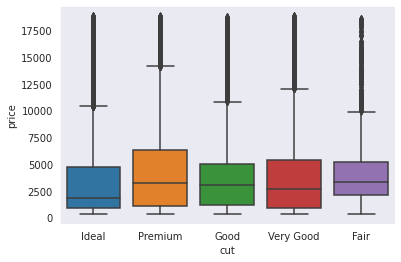

In [8]:
sns.boxplot(data=diamonds, x="cut", y="price");

In [9]:
# Calculamos un aproximado del volumen del diamante según sus dimensiones
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

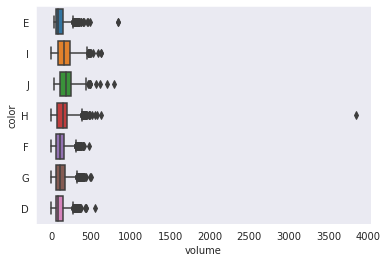

In [10]:
sns.boxplot(data=diamonds, x="volume", y="color", orient="h");

In [ ]:
# Eliminamos los valores extremos para visualizar mejor la gráfica
diamonds_clean = diamonds.loc[diamonds["volume"] < 1000]

In [ ]:
sns.boxplot(data=diamonds_clean, x="volume", y="color", orient="h");

# 2. *Modelado estadístico*

### 2.1 Regresión Lineal

In [1]:
# Importar librerías
import seaborn as sns
import numpy as np
import random as rn

Comenzaremos con la regresión lineal más simple. Una linea recta para ajustar un modelo con la siguiente forma.

$y = ax + b$

donde $a$ se conoce comúnmente como *pendiente*, y $b$ se conoce comúnmente como *intersecto*.

Considere los siguientes datos, que están dispersos alrededor de una línea con una pendiente de 2 y una intersección de -5:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


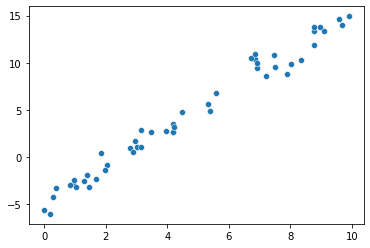

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x,y)

Se puede emplear scikit learn para ajustar los datos a un modelo lineal:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


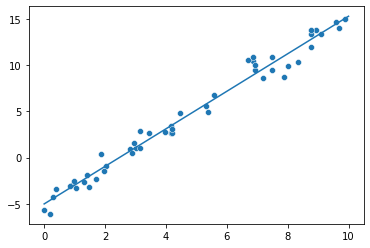

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 50) # Se generan 1000 valores uniformes en el intervalo [0, 10]
yfit = model.predict(xfit[:, np.newaxis])

sns.scatterplot(x, y)
sns.lineplot(xfit, yfit);

Imprimiendo el intercepto y la pendiente

In [4]:
# Valores ideales pendiete = 1 intercepto = 0
print("Pendiente:    ", model.coef_[0])
print("Intercepto:", model.intercept_)

Pendiente:     2.0272088103606953
Intercepto: -4.998577085553204


Ejercicio: 1 

Se deberá obtener el error cuadrático medio y coeficiente de determinación.



*   Error cuadrático medio
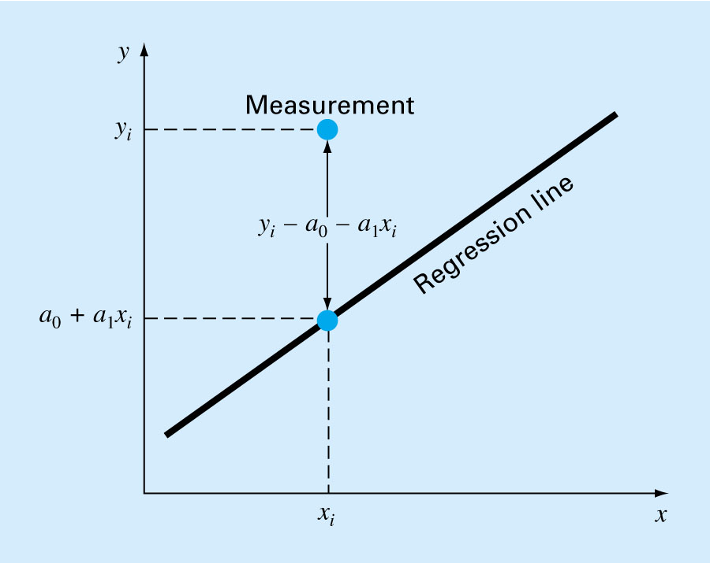



*   Coeficiente de correlación

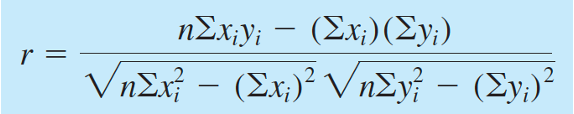

$determinación= r^2$






Obteniendo coeficiente de determinación y error coadrático medio

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Imprimir coeficientes
print("Error cuadrático medio:", mean_squared_error(y, yfit))
print("Coeficiente de determinación:", r2_score(y, yfit))

Error cuadrático medio: 62.09378903093555
Coeficiente de determinación: -0.58735989521677


### Regresión polinomial

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


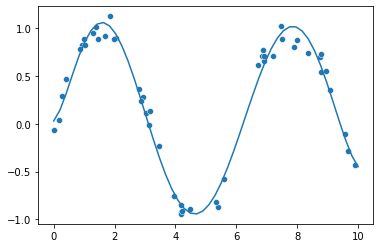

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

# empleando un polinomio de grado 7
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

sns.scatterplot(x, y)
sns.lineplot(xfit, yfit);

# 3. Matemáticas Simbólicas
+ Álgebra lienal
+ Cálculo
+ Ecuaciones algrbraícas

In [ ]:
# Importar la librería Sympy
from sympy import *

# importar una variable simbólica (x)
from sympy.abc import x

# Habilitar impresión avanzada 
init_printing(use_latex='mathjax')

# Lo anterior es equivalente a: 
x = Symbol('x') 

# también se puede definir como:
x, y = symbols('x y')


#### Operaciones Básicas
 

In [ ]:
# Definir una expresión simple
a = 2*x**2 + y 
print(a)
display(a)


In [ ]:
# Operaciones simples con expresiones
display(a + y)
display(a**2 )

In [ ]:
# Expandir una expresión
expand(a**3)

In [ ]:
# Factorización
b = x**3 + 3*x**2 +3*x + 1
display("Expresión: ", b)
display("Factorización",factor(b) )

In [ ]:
# Simplificación de expresiones
# Definir dos expresiones
exp1 = x**2 - y**2
exp2 = (x+y)*(x-y)

# 
display("Primer expresión: ",exp1)
display("Segunda expresión: ",exp2)
display("Simplificación: ", simplify(exp1 - exp2))


#### Sustituciones

In [ ]:
# Definir una expresión simple y realizar sustituciones
import numpy as np

expr = x**2

x_a = np.arange(1, 101)
y_a = np.arange(1, 101)

for i in range(len(x_a)):
  y_a[i] = expr.subs(x,x_a[i])

print(x_a)
print(y_a)

import matplotlib.pyplot as plt
plt.plot(x_a, y_a)
plt.show()

display("Primer substitución x = y", expr.subs(x, y))
display("Segunda substitución x = 0",expr.subs(x, 0))





In [ ]:
# Continuación sustituciones
expr = x**y
display("Expresión original", expr)
expr = expr.subs(y, x**y)
display("Después de la sustitución", expr)

#### Funciones trigonométricas


In [ ]:
# Definición de una expresión trig.
trigx = sin(2*x) + cos(2*x)

# Expansión utilizando identidades
display("Expansión ", expand_trig(trigx))

In [ ]:
# Simplificación
display("Simplificación ", trigsimp(cos(x)**2 + sin(x)**2))



#### Symplificación y Evaluación

In [ ]:
simplify('x**2 + 2*x +4')


In [ ]:
# Definición de una expresión
expr = sqrt(8)

# imprimir la expresión
display(expr)

# Imprimir la evaluación
display(expr.evalf())

# imprimir pi y hacer su evaluación
display("Símbolo ", pi)
display("Evaluación ", pi.evalf(100))

In [ ]:
 # Más simplificaciones
display("",simplify((x**3 + x**2 -x -1)/(x**2 +2*x +1)))
display("",simplify((x**4 - 1)/(x - 1)))
display("",simplify((x**4 - 1)/(x**2 - 1)))
display("",expand((x+2*y)**3))
display("",cancel((x**4 - 1)/(x - 1)))
display("",cancel((x**2 + 2* x + 1)/(x**2 - 1)))
